In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as utils_data

In [2]:
from model import HawkesTransformer
from train import train
from dataset_wrapper import Dataset

In [3]:
!nvidia-smi

Wed Dec  9 20:50:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# ALL GLOBAL VARIABLES

GLOBAL_DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
GLOBAL_SEED = 42
TRAIN_MODEL = True # change to False if you want to load model with pretrained weights

In [5]:
# Unzip data
# !unzip -q fin_data.zip -d data

In [6]:
train_dataset = Dataset('data/train.pkl')
val_dataset = Dataset('data/test.pkl')

train_loader = utils_data.DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = utils_data.DataLoader(val_dataset, batch_size=4, shuffle=False)

In [7]:
model = HawkesTransformer(2, GLOBAL_DEVICE, 512, 4, 1024, 4, 0.1, 'relu').to(GLOBAL_DEVICE)

if TRAIN_MODEL:
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999), eps=1e-05)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.5)

    train_history, val_history = train(model, 50, optimizer, train_loader, val_loader, scheduler, GLOBAL_DEVICE, freq=1)
else:
    model.load_state_dict(torch.load('model_weights.pth'))

[ Epoch 1 ]
(Training)     log-likelihood: -1.458083324375544, RMSE: 20.25114772659046, CE: 0.7099571407380199, accuracy: 0.5796966043801487
(Validation)   log-likelihood: -1.4262015665052021, RMSE: 17.454799735550367, CE: 0.6670440202058802, accuracy: 0.607463768115942
Time elapsed: 5.88 s
[ Epoch 2 ]
(Training)     log-likelihood: -1.3176623020655485, RMSE: 20.24517089350528, CE: 0.6664811649211372, accuracy: 0.6161810997254035
(Validation)   log-likelihood: -1.3783539399997173, RMSE: 17.455801722174492, CE: 0.6621394267059179, accuracy: 0.6160507246376812
Time elapsed: 11.74 s
[ Epoch 3 ]
(Training)     log-likelihood: -1.1323419022107561, RMSE: 20.24035959809559, CE: 0.661981153344447, accuracy: 0.620678454222758
(Validation)   log-likelihood: -1.4347402302519978, RMSE: 17.460254272958142, CE: 0.6616098833314462, accuracy: 0.616268115942029
Time elapsed: 17.60 s
[ Epoch 4 ]
(Training)     log-likelihood: -1.072422013616886, RMSE: 20.23326742008421, CE: 0.6604778939501917, accuracy:

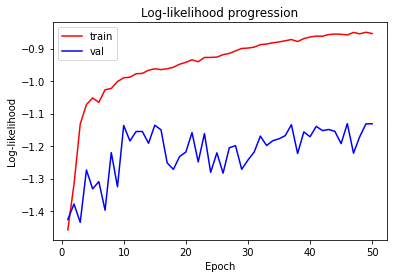

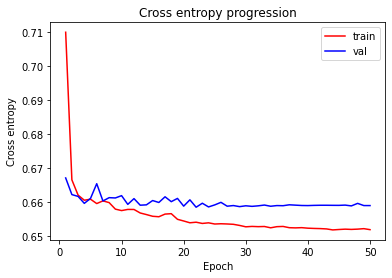

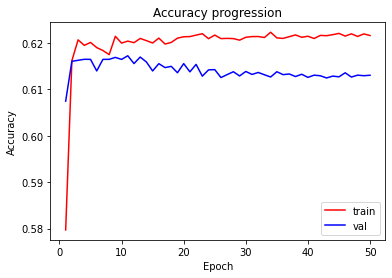

In [13]:
# If model was trained, output plots

if TRAIN_MODEL:
    epochs = list(range(1, 51))

    plt.plot(epochs, train_history['log-likelihood'], c='r', label='train')
    plt.plot(epochs, val_history['log-likelihood'], c='b', label='val')
    plt.title("Log-likelihood progression")
    plt.xlabel("Epoch")
    plt.ylabel("Log-likelihood")
    plt.legend()
    plt.show()

    plt.plot(epochs, train_history['cross entropy'], c='r', label='train')
    plt.plot(epochs, val_history['cross entropy'], c='b', label='val')
    plt.title("Cross entropy progression")
    plt.xlabel("Epoch")
    plt.ylabel("Cross entropy")
    plt.legend()
    plt.show()

    plt.plot(epochs, train_history['accuracy'], c='r', label='train')
    plt.plot(epochs, val_history['accuracy'], c='b', label='val')
    plt.title("Accuracy progression")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()